In [1]:
# prompt: 파일 업로드

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving 서울_1997.csv to 서울_1997.csv
User uploaded file "서울_1997.csv" with length 11299 bytes


In [2]:
import pandas as pd

# 앞의 7줄을 건너뛰고 CSV 파일 읽기
df = pd.read_csv('서울_1997.csv', encoding='cp949', sep=',', skiprows=7)

# 데이터 정보 출력
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       365 non-null    object 
 1   지점       365 non-null    int64  
 2   평균기온(℃)  365 non-null    float64
 3   최저기온(℃)  365 non-null    float64
 4   최고기온(℃)  365 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


<ipython-input-7-4d669108e080>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2 = df.fillna(method='ffill')  # 결측값 채우기
<ipython-input-7-4d669108e080>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may.rename(columns={'최저기온(℃)': 'min_temp', '평균기온(℃)': 'avg_temp', '최고기온(℃)': 'max_temp'}, inplace=True)


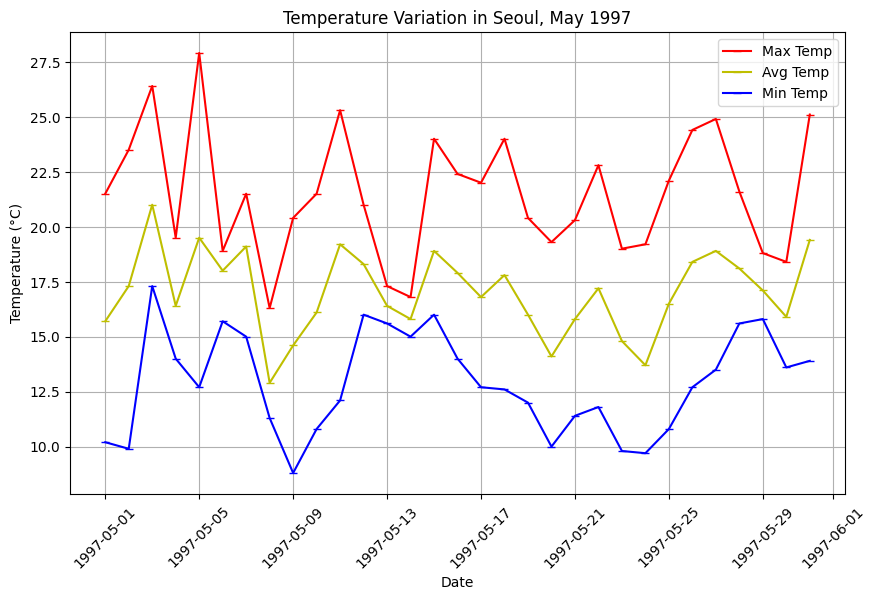

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df2 = df.fillna(method='ffill')  # 결측값 채우기

# 날짜를 datetime 형식으로 변환
df2['날짜'] = pd.to_datetime(df2['날짜'])

# 5월 데이터만 필터링
df_may = df2[df2['날짜'].dt.month == 5]

# 컬럼명 변경
df_may.rename(columns={'최저기온(℃)': 'min_temp', '평균기온(℃)': 'avg_temp', '최고기온(℃)': 'max_temp'}, inplace=True)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.title('Temperature Variation in Seoul, May 1997')

plt.plot(df_may['날짜'], df_may['max_temp'], label='Max Temp', c='r', marker='_')
plt.plot(df_may['날짜'], df_may['avg_temp'], label='Avg Temp', c='y', marker='_')
plt.plot(df_may['날짜'], df_may['min_temp'], label='Min Temp', c='b', marker='_')

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)  # 날짜 라벨 기울이기
plt.legend()
plt.grid()

# 그래프 저장
plt.savefig('서울_5월_기온.png')
plt.show()
